# 2-dimensional plots of functions with SageMath

In [1]:
%display latex

## Plot of a symbolic function

A minimal plot:

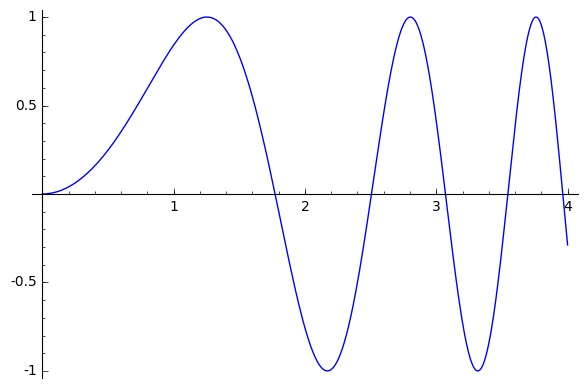

In [2]:
plot(sin(x^2), (x, 0, 4))

Adding some options:

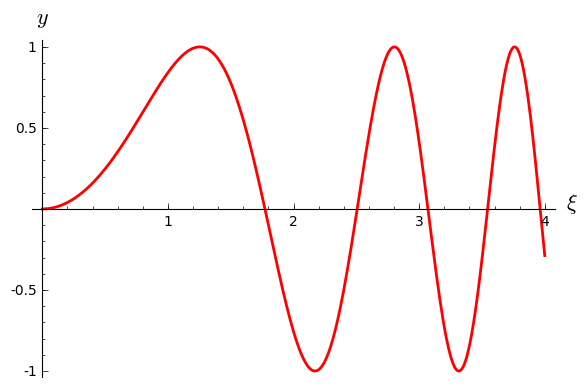

In [3]:
plot(sin(x^2), (x,0,4), color='red', thickness=2, axes_labels=[r"$\xi$", r"$y$"])

The list of options, along with some examples of use, is accessible via

In [4]:
plot?

It is also accessible [online](http://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html#sage.plot.plot.plot).

Storing the plot object in a Python variable:

In [4]:
g1 = plot(sin(x^2), (x,0,4), color='red', thickness=2, axes_labels=[r"$x$", r"$y$"])

In [5]:
type(g1)

In [6]:
print(g1)

Graphics object consisting of 1 graphics primitive


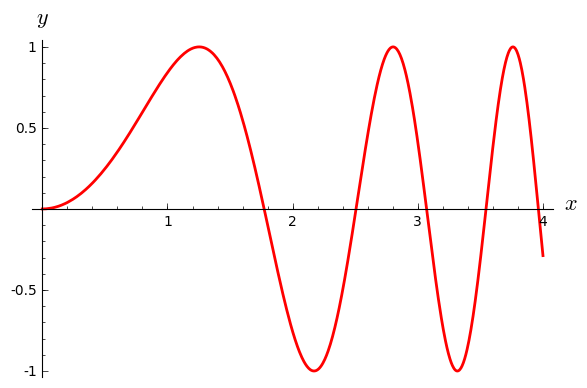

In [7]:
g1

Plot objects can be added:

In [8]:
g2 = plot(cos(x^2), (x,0,4), color='green', linestyle='--',
          thickness=2)

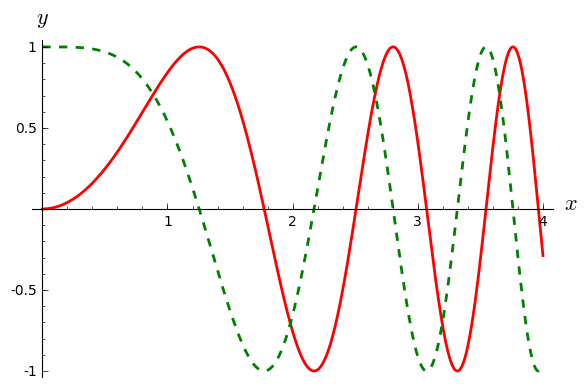

In [9]:
show(g1 + g2)

The command `show` can be used to display the object `g1+g2` with extra options:

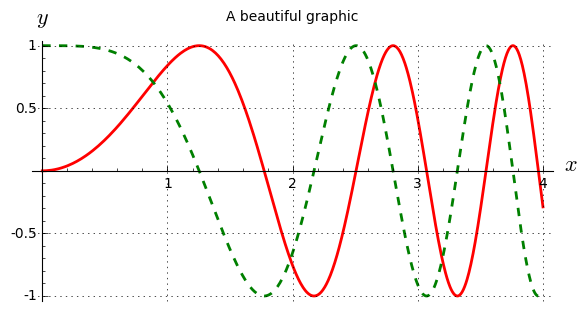

In [10]:
show(g1+g2, gridlines=True, aspect_ratio=1, title='A beautiful graphic')

The documentation for all possible options of show is returned by

In [12]:
g1.show?

It is also accessible online [here](http://doc.sagemath.org/html/en/reference/plotting/sage/plot/graphics.html#sage.plot.graphics.Graphics.show).

Saving the plot in a pdf file (with the same options as in show):

In [11]:
(g1+g2).save("plot_sinx2_cosx2.pdf", 
             gridlines=True, aspect_ratio=1, title='A beautiful graphic')

Adding graphic objects in a Python loop:

In [0]:
chebyshev_T?

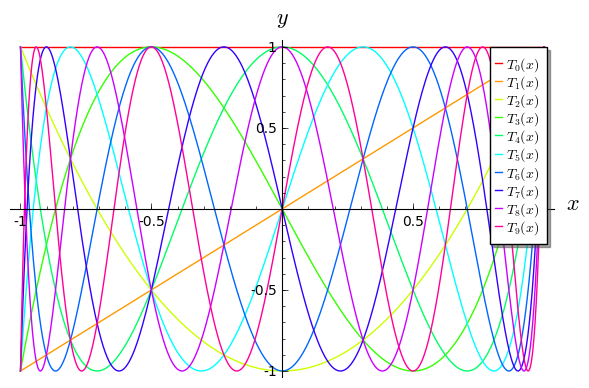

In [12]:
g = Graphics()  # an empty graphic object
for i in range(10):
    g += plot(chebyshev_T(i,x), (x,-1,1), color=hue(i/10),
              legend_label=r"$T_{}(x)$".format(i))
show(g, axes_labels=[r"$x$", r"$y$"], legend_loc='upper right')

*Side remark:* in the above code, we have implicitely redefined the Python variable `i` as an integer denoting the loop index, while `i` was predefined as the imaginary number $i$ such that $i^2=-1$. 
Consequently, we have now

In [13]:
i

In [14]:
e^(i*pi)

To restore the use of the Python name `i` for the imaginary number, it suffices to run

In [15]:
restore('i')

In [16]:
e^(i*pi)

### Symbolic functions versus Python functions

Let us consider a symbolic function:

In [17]:
f(x) = sin(x^2)

In [18]:
f

In [19]:
f(x)

In [20]:
f(3)

We can plot `f(x)` as we did above for `sin(x^2)`:

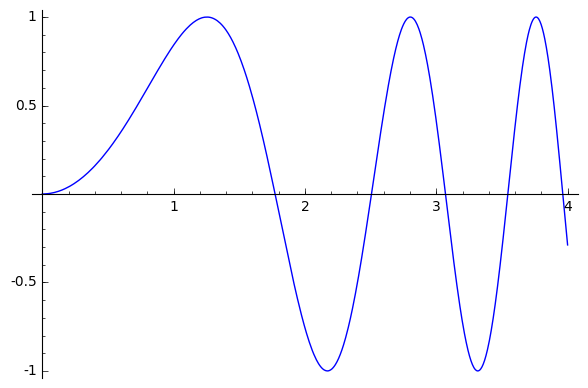

In [21]:
plot(f(x), (x,0,4))

It is also possible to pass the function `f` itself (not the symbolic expression `f(x)`), along with the lower and upper boundaries for the argument of `f` required in the plot, without having to specify any name for this argument:

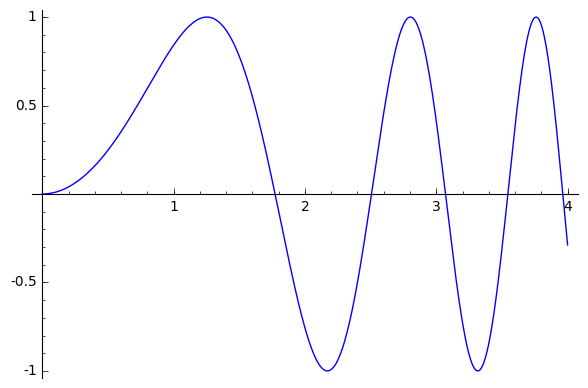

In [22]:
plot(f, (0,4))

This second way of plotting function is actually the one that must be used for the plot of Python functions:

In [23]:
def f1(x):
    if x<2:
        return sin(x)
    return cos(x)

In [24]:
f1

In [25]:
f1(1)

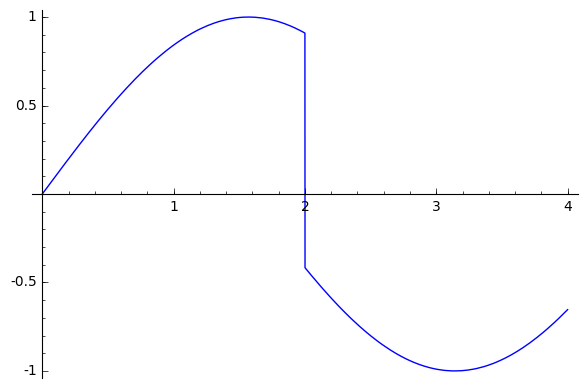

In [26]:
plot(f1, (0,4))

In [27]:
f1(x)

In [28]:
# trace("f1(x)")

In [29]:
# diff(f1, x)

Actually, if we use the first method, we obtain a strange result:

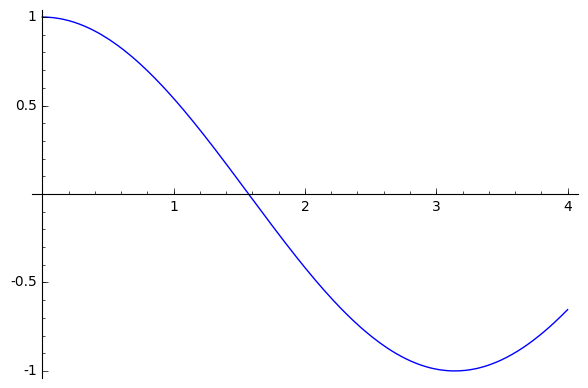

In [30]:
plot(f1(x), (x,0,4))

This occurs because the argument `f1(x)` of the function `plot` is evaluated prior to any loop on the values of `x` within the specified interval. Since for the symbolic variable `x` one has

In [31]:
bool(x<2)

the function `f1` always returns `cos(x)`, hence the plot.

What about plotting Python functions with more than one argument? For instance suppose we want to plot the following function for some fixed value of the argument `a`:

In [32]:
def f2(x, a):
    if x<a:
        return a*sin(x)
    return a*cos(x)

verbose 0 (3749: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 200 points.


verbose 0 (3749: plot.py, generate_plot_points) Last error message: 'f2() takes exactly 2 arguments (1 given)'


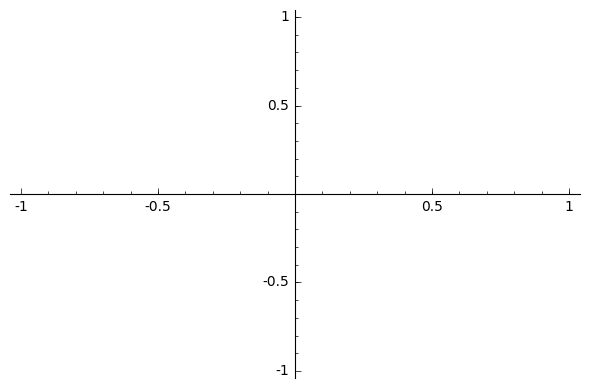

In [33]:
plot(f2, (0,4))

`plot(f2, (0,4))` would return an error here. A first solution would be to wrap `f2` into a single-argument Python function:

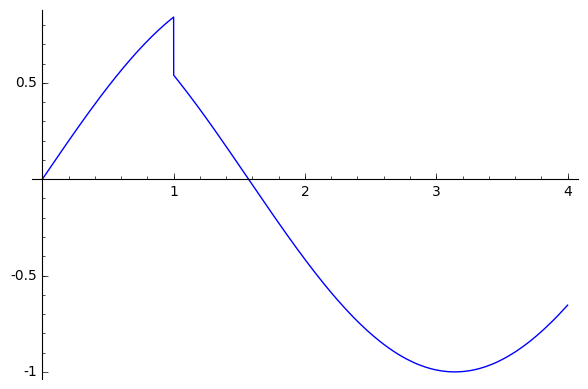

In [34]:
def f2_wrap(x):
    a = 1
    return f2(x,a)
plot(f2_wrap, (0,4))

A better solution is to use create an anonymous function with the Python keyword `lambda`:

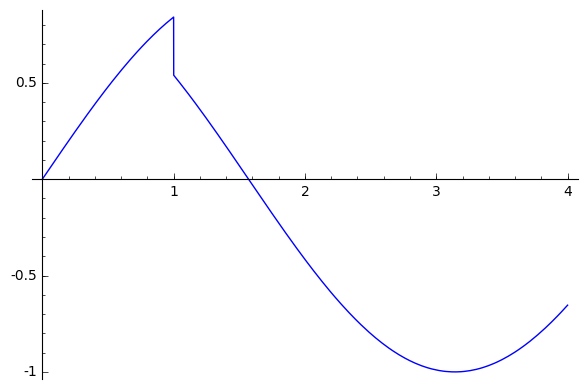

In [35]:
plot(lambda x: f2(x, 1), (0,4))

In particular, it is very usefull in loops:

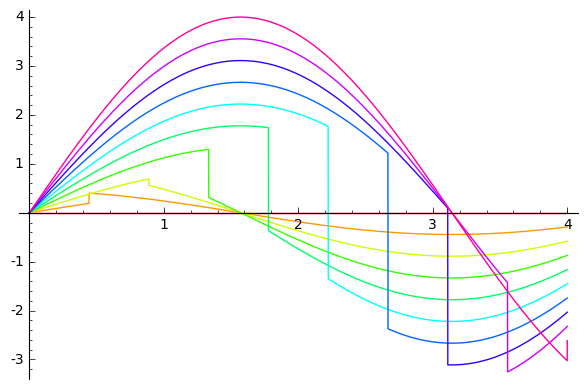

In [36]:
g = Graphics()
for i in range(10):
    a = 4/9*i
    g+=plot(lambda x: f2(x, a), (0,4), color=hue(i/10))
g

## Plot from data

Let us consider a list of values, of the type $(x_i, y_i)$:

In [37]:
data = [(numerical_approx(i/10, digits=2), numerical_approx(sin((i/10)^2))) 
        for i in range(1, 40)]
data

We can plot it with `list_plot`:

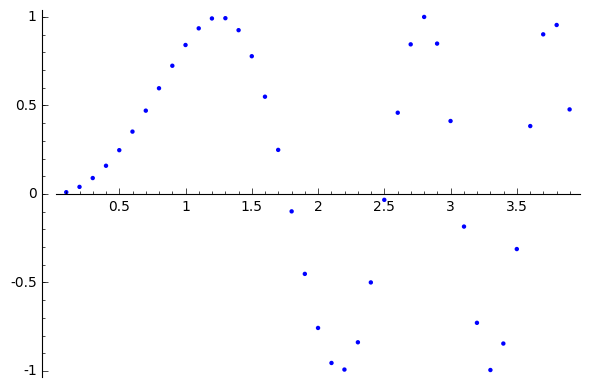

In [38]:
g1 = list_plot(data)
g1

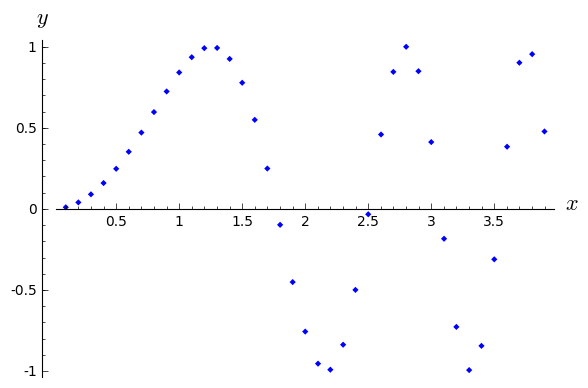

In [39]:
g1 = list_plot(data, marker='D', axes_labels=[r"$x$", r"$y$"])
g1

An alternative is to use `line`:

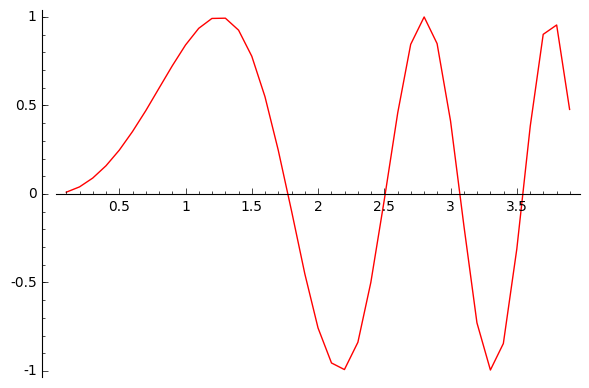

In [40]:
g2 = line(data, color='red')
g2

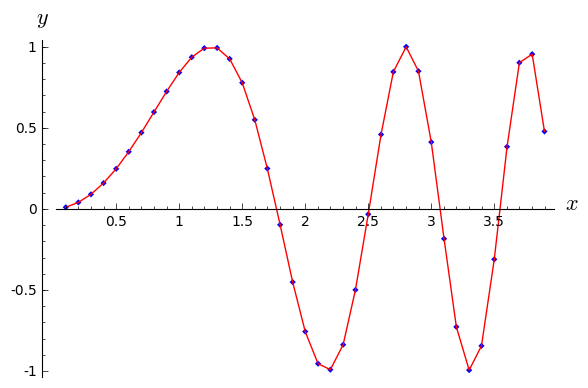

In [41]:
g1+g2

### Plotting data from a file

In [42]:
fi = open("data.d", 'r')  # open file in read-only mode ('r') 
fi.readline()  # skip first line (comments)
data = []  # empty list
for line in fi:  # loop on the file lines
    xs, ys = line.split(' ')  # xs, ys = strings separated by ' '
    data.append((float(xs), float(ys)))  # conversion and add to the list
fi.close()
data

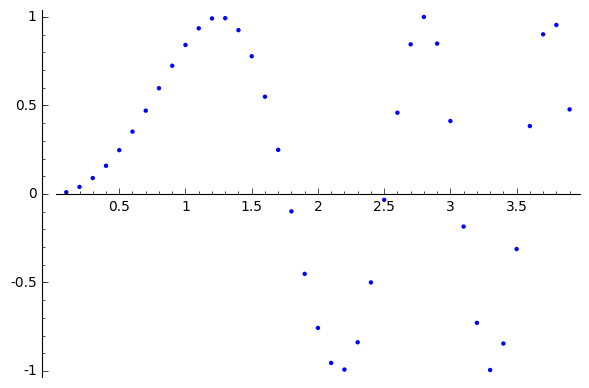

In [43]:
list_plot(data)